In [1]:
#pip install descartes
#pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
counts = pd.read_json('amenities-vancouver.json.gz', lines=True)
counts

,lat,lon,timestamp,amenity,name,tags
0,49.260812,-123.125736,2020-03-20T18:22:12.000-07:00,cafe,Starbucks,"{'brand:wikidata': 'Q37158', 'official_name': ..."
1,49.260953,-123.125704,2019-08-02T18:11:20.000-07:00,fast_food,Salad Loop,{'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...
2,49.373423,-123.291894,2016-10-10T02:14:29.000-07:00,toilets,NaN,{}
3,49.249848,-122.959708,2011-09-06T03:52:10.000-07:00,bbq,NaN,{}
4,49.370898,-123.280448,2015-05-03T00:42:25.000-07:00,place_of_worship,St. Monica's Anglican Church,"{'addr:housenumber': '6404', 'addr:street': 'W..."
...,...,...,...,...,...,...
17713,49.278424,-122.806704,2013-03-26T23:45:49.000-07:00,cafe,Creekside Coffee,{}
17714,49.278770,-122.797628,2013-03-26T23:45:49.000-07:00,restaurant,Togo Sushi,{'cuisine': 'japanese'}
17715,49.276443,-122.790138,2013-03-26T23:45:50.000-07:00,parking,NaN,{}
17716,49.282666,-122.826978,2019-09-13T13:56:49.000-07:00,pub,Brown's Social House,"{'addr:housenumber': '215', 'brewery': 'Guinne..."


In [4]:
#dowload from: https://download.geofabrik.de/north-america/canada/british-columbia.html
#vancouver_street_map = gpd.read_file('public-streets/public-streets.shp')
bc_street_map = gpd.read_file('british-columbia-latest-free.shp')

In [5]:
crs = {'init':'epsg:4326'}

In [6]:
geometry = [Point(xy) for xy in zip(counts['lon'], counts['lat'])]

In [7]:
geo_df = gpd.GeoDataFrame(counts, crs = crs, geometry = geometry)
#geo_df

/Users/jeanette/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [8]:
amenity_count = pd.DataFrame({'amenity':geo_df['amenity'], 'count':geo_df['lat']})
amenity_count = amenity_count.groupby('amenity', as_index=False).count()
amenity_count = amenity_count.sort_values('count', ascending=False)
#amenity_count
#amenity_count['amenity'].tolist()

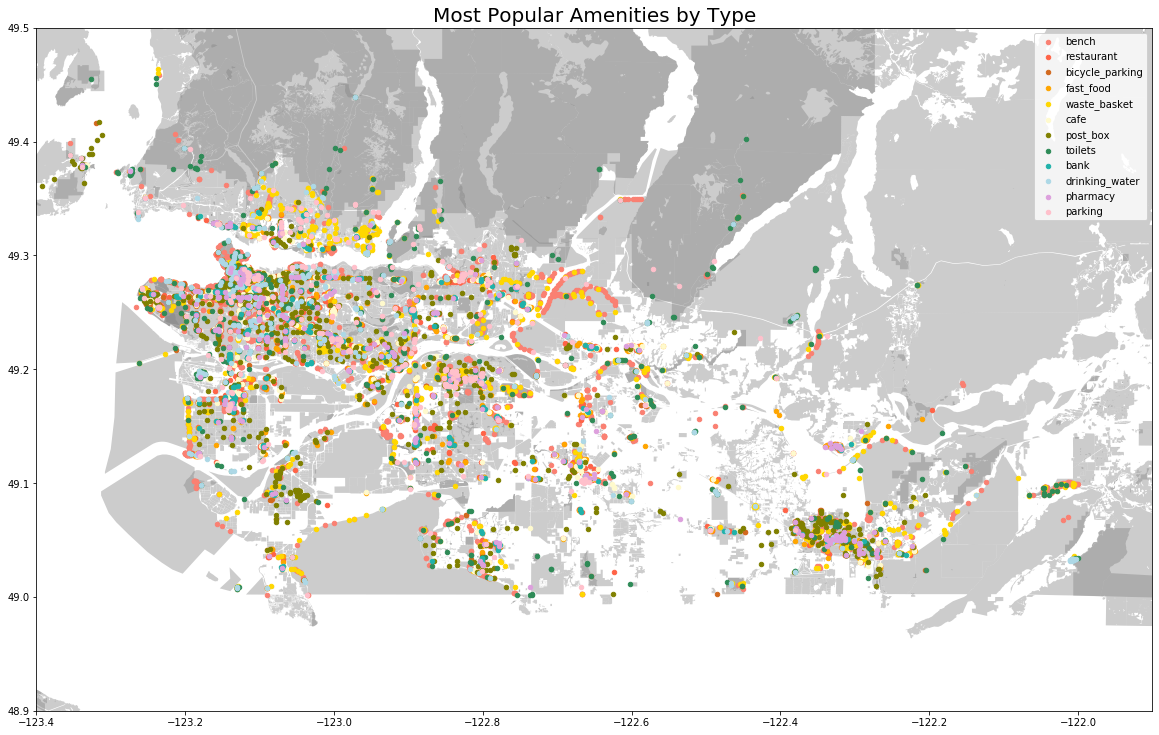

In [9]:
fig,ax = plt.subplots(figsize = (20,20))
bc_street_map.plot(ax=ax, alpha=0.4, color='grey')
ax.set_xlim(-123.4,-121.9)
ax.set_ylim(48.9,49.5)
ax.set_title("Most Popular Amenities by Type", fontsize=20)
geo_df[geo_df['amenity']=='bench'].plot(ax=ax,markersize=20,color="salmon",marker="o",label="bench")
geo_df[geo_df['amenity']=='restaurant'].plot(ax=ax, markersize=20,color="tomato",marker="o",label="restaurant")
geo_df[geo_df['amenity']=='bicycle_parking'].plot(ax=ax, markersize=20,color="chocolate",marker="o",label="bicycle_parking")
geo_df[geo_df['amenity']=='fast_food'].plot(ax=ax, markersize=20,color="orange",marker="o",label="fast_food")
geo_df[geo_df['amenity']=='waste_basket'].plot(ax=ax, markersize=20,color="gold",marker="o",label="waste_basket")
geo_df[geo_df['amenity']=='cafe'].plot(ax=ax, markersize=20,color="lemonchiffon",marker="o",label="cafe")
geo_df[geo_df['amenity']=='post_box'].plot(ax=ax, markersize=20,color="olive",marker="o",label="post_box")
geo_df[geo_df['amenity']=='toilets'].plot(ax=ax, markersize=20,color="seagreen",marker="o",label="toilets")
geo_df[geo_df['amenity']=='bank'].plot(ax=ax, markersize=20,color="lightseagreen",marker="o",label="bank")
geo_df[geo_df['amenity']=='drinking_water'].plot(ax=ax, markersize=20,color="lightblue",marker="o",label="drinking_water")
geo_df[geo_df['amenity']=='pharmacy'].plot(ax=ax, markersize=20,color="plum",marker="o",label="pharmacy")
geo_df[geo_df['amenity']=='parking'].plot(ax=ax, markersize=20,color="pink",marker="o",label="parking")
plt.legend(prop={'size':10})

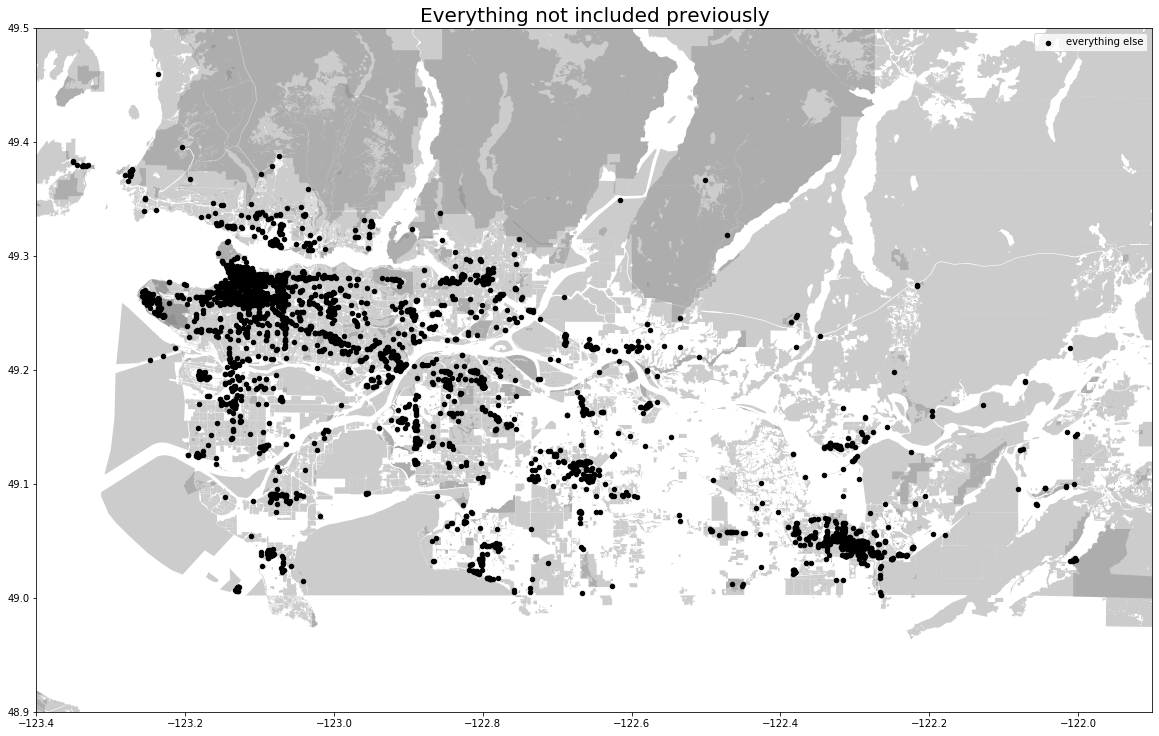

In [10]:
fig,ax = plt.subplots(figsize = (20,20))
bc_street_map.plot(ax=ax, alpha=0.4, color='grey')
ax.set_xlim(-123.4,-121.9)
ax.set_ylim(48.9,49.5)
ax.set_title("Everything not included previously", fontsize=20)
geo_df[(geo_df['amenity']!='bench')
      & (geo_df['amenity']!='restaurant')
      & (geo_df['amenity']!='bicycle_parking')
      & (geo_df['amenity']!='fast_food')
      & (geo_df['amenity']!='waste_basket')
      & (geo_df['amenity']!='cafe')
      & (geo_df['amenity']!='post_box')
      & (geo_df['amenity']!='toilets')
      & (geo_df['amenity']!='bank')
      & (geo_df['amenity']!='drinking_water')
      & (geo_df['amenity']!='pharmacy')
      & (geo_df['amenity']!='parking')].plot(ax=ax, markersize=20,color="black",marker="o",label="everything else")
plt.legend(prop={'size':10})

In [11]:
name_count = pd.DataFrame({'name':geo_df['name'], 'count':geo_df['lat']})
name_count = name_count.groupby('name', as_index=False).count()
name_count = name_count.sort_values('count', ascending=False)
name_count = name_count[name_count['count']>1]
#name_count
#name_count['name'].tolist()

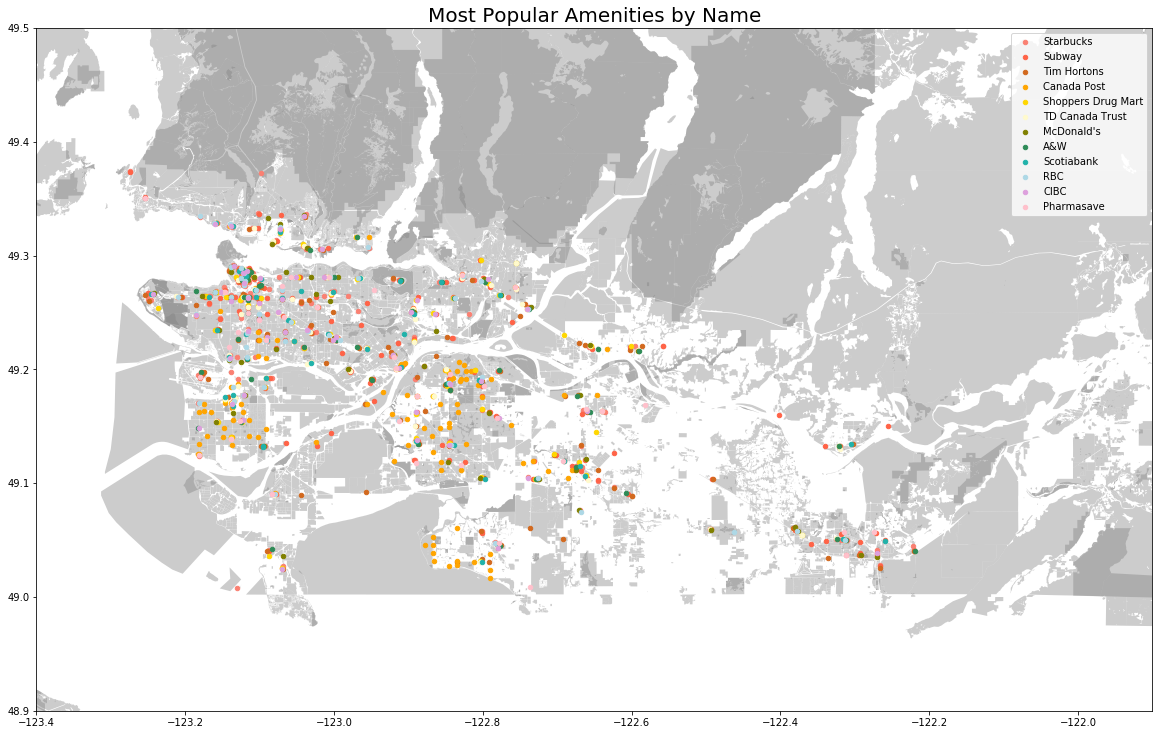

In [12]:
fig,ax = plt.subplots(figsize = (20,20))
bc_street_map.plot(ax=ax, alpha=0.4, color='grey')
ax.set_xlim(-123.4,-121.9)
ax.set_ylim(48.9,49.5)
ax.set_title("Most Popular Amenities by Name", fontsize=20)
geo_df[geo_df['name']=='Starbucks'].plot(ax=ax,markersize=20,color="salmon",marker="o",label="Starbucks")
geo_df[geo_df['name']=='Subway'].plot(ax=ax, markersize=20,color="tomato",marker="o",label="Subway")
geo_df[geo_df['name']=='Tim Hortons'].plot(ax=ax, markersize=20,color="chocolate",marker="o",label="Tim Hortons")
geo_df[geo_df['name']=='Canada Post'].plot(ax=ax, markersize=20,color="orange",marker="o",label="Canada Post")
geo_df[geo_df['name']=='Shoppers Drug Mart'].plot(ax=ax, markersize=20,color="gold",marker="o",label="Shoppers Drug Mart")
geo_df[geo_df['name']=='TD Canada Trust'].plot(ax=ax, markersize=20,color="lemonchiffon",marker="o",label="TD Canada Trust")
geo_df[geo_df['name']=="McDonald's"].plot(ax=ax, markersize=20,color="olive",marker="o",label="McDonald's")
geo_df[geo_df['name']=='A&W'].plot(ax=ax, markersize=20,color="seagreen",marker="o",label="A&W")
geo_df[geo_df['name']=='Scotiabank'].plot(ax=ax, markersize=20,color="lightseagreen",marker="o",label="Scotiabank")
geo_df[geo_df['name']=='RBC'].plot(ax=ax, markersize=20,color="lightblue",marker="o",label="RBC")
geo_df[geo_df['name']=='CIBC'].plot(ax=ax, markersize=20,color="plum",marker="o",label="CIBC")
geo_df[geo_df['name']=='Pharmasave'].plot(ax=ax, markersize=20,color="pink",marker="o",label="Pharmasave")
plt.legend(prop={'size':10})